In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [34]:
path = '/content/drive/MyDrive/dataset/24_03_Travel Agency Data.csv'
df = pd.read_csv(path)

In [35]:
df

,CustomerID,Age,Country,Destination,PackageType,BookingChannel,NumberOfTravelers,TripDuration,Season,TotalSpend,Satisfaction
0,1,56,UK,Tokyo,Standard,Online,3,6,Fall,"3,868.74",4
1,2,69,UK,Tokyo,Budget,Online,2,3,Fall,"2,671.71",4
2,3,46,USA,Tokyo,Budget,Agent,1,10,Fall,"1,472.14",4
3,4,32,France,Sydney,Budget,Direct,1,9,Summer,"1,472.14",4
4,5,60,Germany,Paris,Standard,Agent,3,13,Fall,"3,718.06",4
...,...,...,...,...,...,...,...,...,...,...,...
995,996,60,Canada,Sydney,Budget,Online,3,8,Spring,"3,963.79",5
996,997,64,Australia,New York,Luxury,Direct,4,9,Spring,"4,149.21",2
997,998,62,Canada,New York,Budget,Agent,2,14,Spring,"2,301.60",1
998,999,35,Australia,Paris,Standard,Online,2,8,Summer,"4,762.19",5


In [36]:
df.shape

(1000, 11)

In [37]:
df.head()

,CustomerID,Age,Country,Destination,PackageType,BookingChannel,NumberOfTravelers,TripDuration,Season,TotalSpend,Satisfaction
0,1,56,UK,Tokyo,Standard,Online,3,6,Fall,"3,868.74",4
1,2,69,UK,Tokyo,Budget,Online,2,3,Fall,"2,671.71",4
2,3,46,USA,Tokyo,Budget,Agent,1,10,Fall,"1,472.14",4
3,4,32,France,Sydney,Budget,Direct,1,9,Summer,"1,472.14",4
4,5,60,Germany,Paris,Standard,Agent,3,13,Fall,"3,718.06",4


In [38]:
df.tail()

,CustomerID,Age,Country,Destination,PackageType,BookingChannel,NumberOfTravelers,TripDuration,Season,TotalSpend,Satisfaction
995,996,60,Canada,Sydney,Budget,Online,3,8,Spring,"3,963.79",5
996,997,64,Australia,New York,Luxury,Direct,4,9,Spring,"4,149.21",2
997,998,62,Canada,New York,Budget,Agent,2,14,Spring,"2,301.60",1
998,999,35,Australia,Paris,Standard,Online,2,8,Summer,"4,762.19",5
999,1000,55,Canada,Sydney,Luxury,Direct,1,8,Winter,"2,329.08",2


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         1000 non-null   int64 
 1   Age                1000 non-null   int64 
 2   Country            1000 non-null   object
 3   Destination        1000 non-null   object
 4   PackageType        1000 non-null   object
 5   BookingChannel     1000 non-null   object
 6   NumberOfTravelers  1000 non-null   int64 
 7   TripDuration       1000 non-null   int64 
 8   Season             1000 non-null   object
 9   TotalSpend         1000 non-null   object
 10  Satisfaction       1000 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [40]:
df.isna().sum()

CustomerID           0
Age                  0
Country              0
Destination          0
PackageType          0
BookingChannel       0
NumberOfTravelers    0
TripDuration         0
Season               0
TotalSpend           0
Satisfaction         0
dtype: int64

In [41]:
df1=df.copy()

firstly we convert the total amount spend on the trip to float

In [51]:
df1.TotalSpend=df.TotalSpend.str.replace(',','').str.strip().astype(dtype='float')

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         1000 non-null   int64  
 1   Age                1000 non-null   int64  
 2   Country            1000 non-null   object 
 3   Destination        1000 non-null   object 
 4   PackageType        1000 non-null   object 
 5   BookingChannel     1000 non-null   object 
 6   NumberOfTravelers  1000 non-null   int64  
 7   TripDuration       1000 non-null   int64  
 8   Season             1000 non-null   object 
 9   TotalSpend         1000 non-null   float64
 10  Satisfaction       1000 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 86.1+ KB


In [62]:
df1.groupby(['Destination','PackageType']).TotalSpend.mean().to_frame().sort_values(by='TotalSpend', ascending= False)

TotalSpend
Destination PackageType             
New York    Standard     2939.212093
            Luxury       2893.980652
Cape Town   Luxury       2844.348475
Tokyo       Standard     2834.458793
Cape Town   Standard     2797.272647
Tokyo       Luxury       2785.426364
Rome        Luxury       2739.546000
Sydney      Standard     2711.360179
            Luxury       2697.686406
Paris       Luxury       2615.984828
            Budget       2606.903019
Rome        Standard     2579.114600
New York    Budget       2442.465385
Paris       Standard     2389.217727
Sydney      Budget       2357.904697
Rome        Budget       2325.161803
Tokyo       Budget       2314.580000
Cape Town   Budget       2255.000204

<Axes: ylabel='Destination,PackageType'>

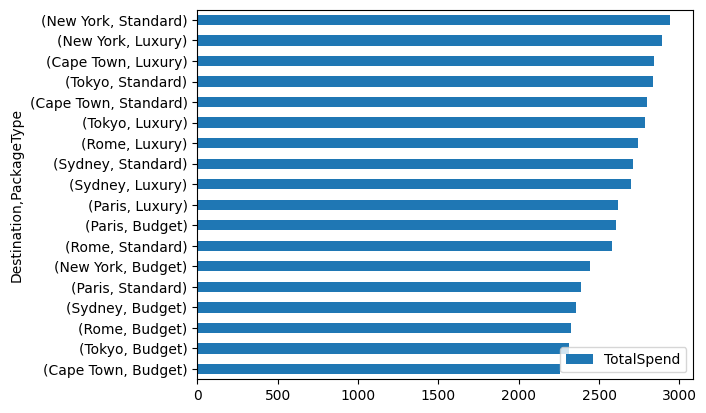

In [65]:
df1.groupby(['Destination','PackageType']).TotalSpend.mean().to_frame().sort_values(by='TotalSpend', ascending= True).plot(kind='barh')


1. New York is a popular and well-known tourist destination, attracting a large number of travelers from various regions. The high demand for travel to New York, coupled with its reputation as a premium destination, could lead to higher average total spend across both standard and luxury packages.
Cape Town, being a renowned destination in South Africa, may also attract travelers willing to splurge on luxury packages to experience its unique offerings and scenery.

2. Luxury packages, by their very nature, tend to be more expensive, offering premium amenities, exclusive experiences, and upscale accommodations, which could contribute to the higher average total spend for luxury packages in both New York and Cape Town.

In [67]:
df1.groupby(['Destination','PackageType']).Satisfaction.mean().to_frame().sort_values(by='Satisfaction', ascending= False)

,,Satisfaction
Destination,PackageType,
New York,Budget,3.903846
Rome,Budget,3.819672
Tokyo,Budget,3.793651
Cape Town,Budget,3.775510
Sydney,Budget,3.696970
Paris,Budget,3.679245
Sydney,Luxury,3.421875
Rome,Standard,3.300000
Cape Town,Standard,3.117647


<Axes: ylabel='Destination,PackageType'>

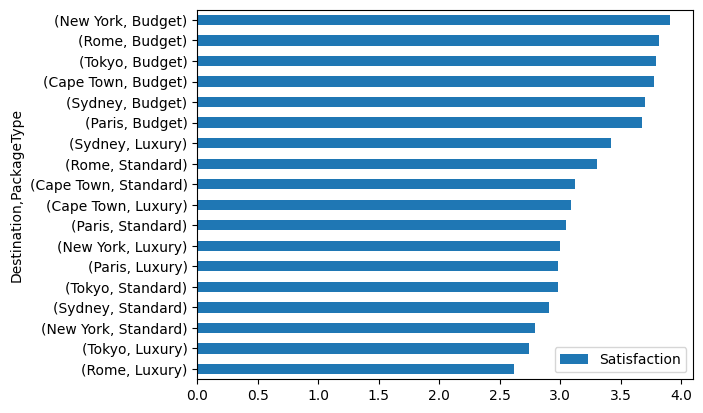

In [69]:
df1.groupby(['Destination','PackageType']).Satisfaction.mean().to_frame().sort_values(by='Satisfaction', ascending= True).plot(kind='barh')

 the follwing may result to the cause:

1. Budget packages often come with lower expectations from customers, and even a reasonably good experience can exceed their expectations, leading to higher satisfaction ratings.
2. luxury packages command a premium price, and customers may have very high expectations in terms of service quality, amenities, and overall experience. If these elevated expectations are not met, it can result in lower satisfaction scores, despite the higher price point.
3. Customers who opt for luxury packages may perceive that the value delivered does not justify the higher cost, leading to a mismatch between the price paid and the perceived value received. This mismatch can contribute to lower satisfaction scores for luxury packages.
4. The customer profiles for luxury and budget packages may differ in terms of their expectations, priorities, and what they value most in their travel experiences.




In [71]:
df1.groupby(['Destination','PackageType']).Age.mean().to_frame().sort_values(by='Age', ascending= False)

,,Age
Destination,PackageType,
Paris,Luxury,47.517241
Rome,Luxury,47.454545
Sydney,Luxury,46.156250
Rome,Standard,45.880000
Sydney,Budget,44.939394
Tokyo,Budget,44.571429
Sydney,Standard,44.160714
Rome,Budget,44.081967
Cape Town,Luxury,43.966102


<Axes: ylabel='Destination,PackageType'>

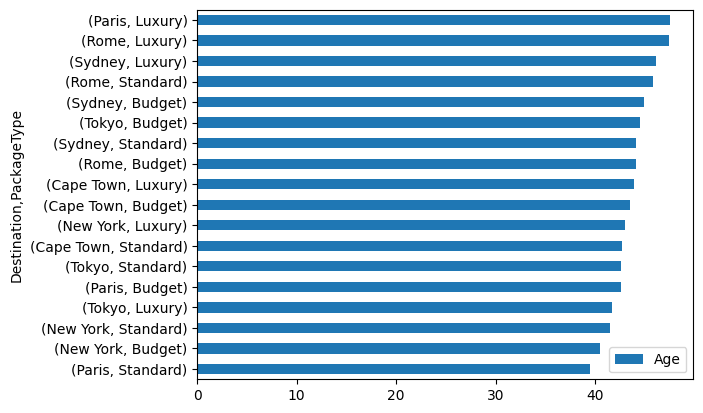

In [73]:
df1.groupby(['Destination','PackageType']).Age.mean().to_frame().sort_values(by='Age', ascending= True).plot(kind='barh')


Paris and Rome are renowned destinations with rich cultural heritage, historical landmarks, and iconic attractions that hold significant appeal for travelers seeking luxury experiences.
The allure of iconic sites like the Eiffel Tower, Louvre Museum, Colosseum, and Vatican City, among others, may contribute to the popularity of luxury packages in these cities across various age groups.

check if there is a correlation between number of trabell, totalspend, bookingchannel

In [76]:
.corrdf1.BookingChannel =df1.BookingChannel.map({'Online':1,'Direct':2,'Agent':3})

In [78]:
df1[['BookingChannel','TotalSpend','NumberOfTravelers']].corr()

,BookingChannel,TotalSpend,NumberOfTravelers
BookingChannel,1.000000,0.031891,-0.030518
TotalSpend,0.031891,1.000000,0.050127
NumberOfTravelers,-0.030518,0.050127,1.000000


<Axes: >

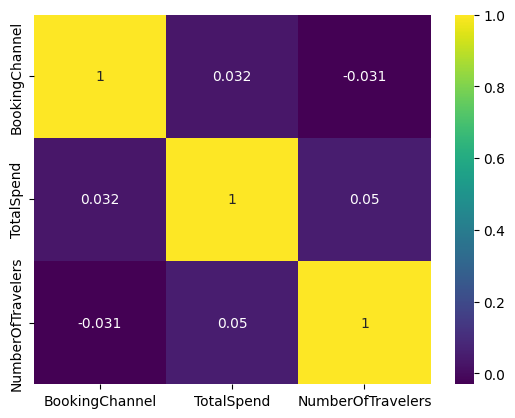

In [80]:
sns.heatmap(data=df1[['BookingChannel','TotalSpend','NumberOfTravelers']].corr(), cmap='viridis',annot=True)

In [88]:
df1.groupby(['Season']).TotalSpend.mean().to_frame().sort_values(by='TotalSpend',ascending = False )

,TotalSpend
Season,
Summer,2747.119683
Fall,2646.797380
Winter,2633.818213
Spring,2437.375742


<Axes: ylabel='Season'>

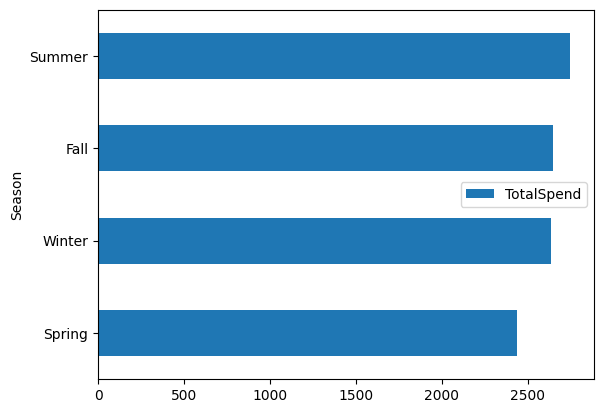

In [91]:
df1.groupby(['Season']).TotalSpend.mean().to_frame().sort_values(by='TotalSpend',ascending = True ).plot(kind='barh')

<Axes: ylabel='Season'>

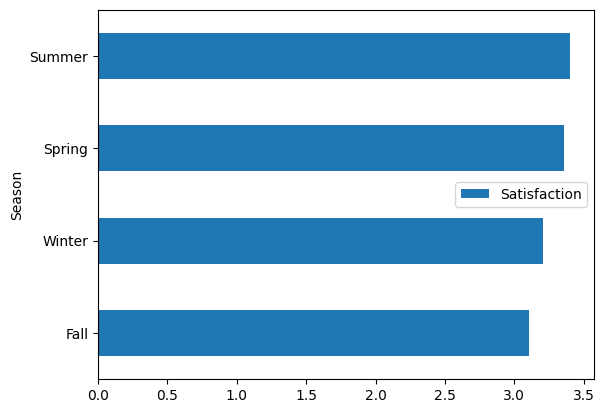

In [94]:
df1.groupby(['Season']).Satisfaction.mean().to_frame().sort_values(by='Satisfaction',ascending = True ).plot(kind='barh')

 1. Summer is generally considered the peak travel season for many destinations, as it coincides with school holidays and favorable weather conditions. During this period, demand for travel tends to be higher, which can lead to increased prices for accommodations, flights, and other travel-related services, resulting in higher average total spend.
 2.  Travel providers, such as hotels, resorts, and tour operators, may implement seasonal pricing strategies, with higher rates during the summer months to capitalize on the increased demand. This can directly impact the average total spend for travelers during this season.

In [95]:
df1.groupby(['Season']).TripDuration.mean().to_frame().sort_values(by='TripDuration',ascending = False )

,TripDuration
Season,
Fall,9.235808
Winter,8.650190
Summer,8.575397
Spring,8.503906


 For many regions and destinations, summer is considered the peak tourist season. This is often due to a combination of factors such as school holidays, favorable weather, and cultural events or festivals. The peak season often sees an influx of tourists, resulting in higher travel demand and bookings.

In [99]:
df1.groupby(['Country']).TotalSpend.sum().to_frame().sort_values(by='TotalSpend', ascending= False)

,TotalSpend
Country,
USA,470329.51
Australia,458672.30
Canada,446499.87
UK,441461.04
France,432284.97
Germany,365805.45


In [102]:
df1.groupby(['Country']).TotalSpend.mean().to_frame().sort_values(by='TotalSpend', ascending= False)

,TotalSpend
Country,
Canada,2739.263006
USA,2672.326761
Australia,2666.699419
UK,2596.829647
France,2557.899231
Germany,2438.703000


1.  The USA topping the list for the sum of total spend likely indicates that it is one of the largest source markets for your travel agency in terms of overall customer volume. Given the large population and high demand for travel from the USA, it's not surprising that the cumulative total spend from this country is higher than others.
2.  Canada topping the list for the average total spend suggests that customers from Canada, on average, have a higher spending power or propensity to spend more per trip or booking compared to other countries. This could be attributed to factors such as higher disposable incomes, a preference for more luxurious travel experiences, or a willingness to invest in longer or more comprehensive trips.

In [103]:
df1.groupby(['Destination','PackageType', 'Country']).TotalSpend.mean().to_frame().sort_values(by='TotalSpend', ascending= False)

,,,TotalSpend
Destination,PackageType,Country,
Tokyo,Budget,Canada,3756.866000
Cape Town,Standard,UK,3676.410000
Rome,Budget,Canada,3628.370000
Tokyo,Luxury,Germany,3602.053333
New York,Standard,Australia,3569.910000
...,...,...,...
Cape Town,Budget,France,1878.337143
Tokyo,Budget,France,1807.396316
Rome,Standard,Germany,1754.121250


<Axes: ylabel='PackageType,Country'>

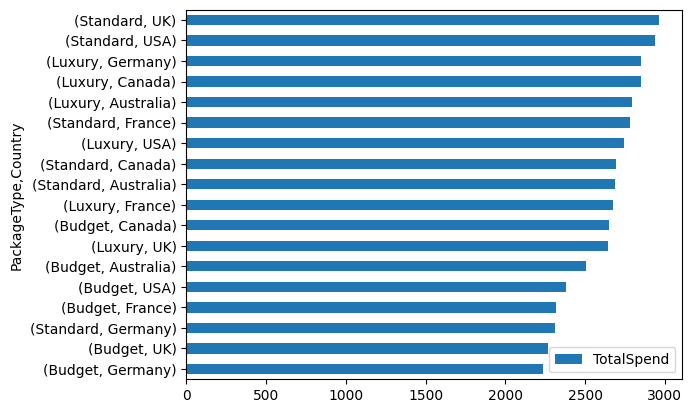

In [117]:
df1.groupby(['PackageType', 'Country']).TotalSpend.mean().to_frame().sort_values(by='TotalSpend', ascending= True).plot(kind='barh')

1.  The USA and UK are both large source markets with a significant population base and a culture of travel. These countries may have a higher demand for standard package types due to factors such as affordability, value for money, and the prevalence of budget-conscious travelers.
2.  Travelers from the USA and UK may be more price-sensitive, leading them to opt for standard package types that offer a balance between affordability and essential inclusions. This could be influenced by factors such as economic conditions, disposable incomes, or travel budgets

<Axes: ylabel='Destination,Country'>

<Figure size 2000x600 with 0 Axes>

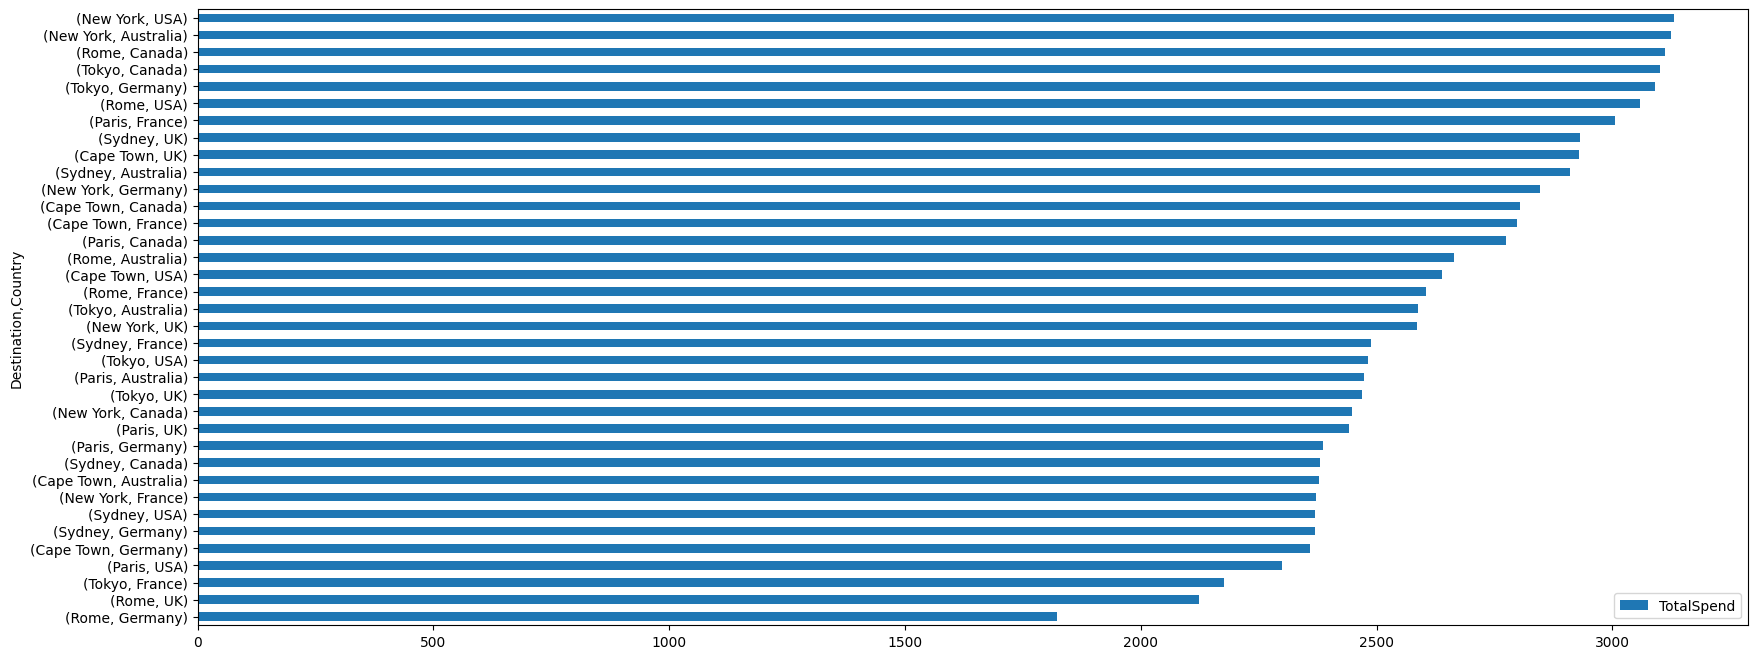

In [121]:

plt.figure(figsize=(20,6))
df1.groupby(['Destination', 'Country']).TotalSpend.mean().to_frame().sort_values(by='TotalSpend', ascending= True).plot(kind='barh', figsize=(20,8))

 1. Both the USA and Australia have well-established tourism marketing campaigns and promotions that highlight New York City as a must-visit destination. Effective marketing efforts by tourism boards, travel agencies, or other stakeholders can influence travel preferences and drive demand for this destination from these countries.
 2.  New York City is a major global business and financial hub, which may attract a considerable number of business travelers and professionals from both the USA and Australia. Corporate travel, conferences, or industry events can contribute to the high volume of visitors from these countries.